### mAP

struct:
{ { str_path, { {str_path_r_1, p_r_1}, {str_path_r_2, p_r_2}, .. {str_path_r_n, p_r_1} } }, ... }

str_path
{str_path_r_1, p_r_1}

In [144]:
import os
import matplotlib.pyplot as plt
%matplotlib inline  

In [116]:
#for test mAP()

str_path = "0001_c1s1_001051_03.jpg"

str_path_r_1 = "0006_c5s3_076037_03.jpg"
p_r_1 = 0.2
str_path_r_3 = "0006_c5s4_076037_03.jpg"
p_r_3 = 0.2
str_path_r_6 = "0006_c5s5_076037_03.jpg"
p_r_6 = 0.05

str_path_r_2 = "0001_c2s6_001976_03.jpg"
p_r_2 = 0.9
str_path_r_4 = "0001_c2s7_001976_03.jpg"
p_r_4 = 0.1
str_path_r_5 = "0001_c2s8_001976_03.jpg"
p_r_5 = 0.9



In [86]:
rangs_list_p = []

rangs_list_p.append((str_path_r_1, p_r_1))
rangs_list_p.append((str_path_r_2, p_r_2))
rangs_list_p.append((str_path_r_3, p_r_3))
rangs_list_p.append((str_path_r_4, p_r_4))
rangs_list_p.append((str_path_r_5, p_r_5))
rangs_list_p.append((str_path_r_6, p_r_6))

In [87]:
rangs_list_p

[('0006_c5s3_076037_03.jpg', 0.2),
 ('0001_c2s6_001976_03.jpg', 0.9),
 ('0006_c5s4_076037_03.jpg', 0.2),
 ('0001_c2s7_001976_03.jpg', 0.1),
 ('0001_c2s8_001976_03.jpg', 0.9),
 ('0006_c5s5_076037_03.jpg', 0.05)]

In [88]:
type(rangs_list_p[0])

tuple

In [89]:
rangs = []
rangs.append((str_path, rangs_list_p))

In [90]:
rangs

[('0001_c1s1_001051_03.jpg',
  [('0006_c5s3_076037_03.jpg', 0.2),
   ('0001_c2s6_001976_03.jpg', 0.9),
   ('0006_c5s4_076037_03.jpg', 0.2),
   ('0001_c2s7_001976_03.jpg', 0.1),
   ('0001_c2s8_001976_03.jpg', 0.9),
   ('0006_c5s5_076037_03.jpg', 0.05)])]

In [124]:
def mAP(rangs, dir_="data/test/"):
    #{ { str_path, { {str_path_r_1, p_r_1}, {str_path_r_2, p_r_2}, .. {str_path_r_n, p_r_1} } }, ... }
    
    len_rangs = len(rangs)
    sum_mAP = 0
    
    for rang in rangs:
        person = rang[0].split('_')[0]
        len_person = len(os.listdir(dir_ + person + '/'))
        #len_person = 3 #for test
        rang[1].sort(key=lambda tup: tup[1], reverse=True) #sort ranging
        
        sum_P = 0
        i = 0
        sum_true = 0
        for rang_r in rang[1]:
            i += 1
            if rang_r[0].split('_')[0] == person:
                sum_true += 1
                sum_P += sum_true/i
            #print("Person: ", person, rang_r[0].split('_')[0], sum_true/i)
        #print(sum_P)
        
        sum_mAP += sum_P/len_person
    return sum_mAP/len_rangs

In [118]:
mAP(rangs) #test

0.8666666666666667

In [123]:
mAP(rangs=rangs) #test

Person:  0001 0001 1.0
Person:  0001 0001 1.0
Person:  0001 0006 0.6666666666666666
Person:  0001 0006 0.5
Person:  0001 0001 0.6
Person:  0001 0006 0.5
2.6


0.8666666666666667

In [173]:
def print_PR_curves(rangs, dir_="data/test/"):
    #{ { str_path, { {str_path_r_1, p_r_1}, {str_path_r_2, p_r_2}, .. {str_path_r_n, p_r_1} } }, ... }
    
    len_rangs = len(rangs)
    
    for rang in rangs:
        list_P = []
        list_R = []
        person = rang[0].split('_')[0]
        len_person = len(os.listdir(dir_ + person + '/'))
        #len_person = 3 #for test
        rang[1].sort(key=lambda tup: tup[1], reverse=True) #sort ranging
        
        sum_P = 0
        i = 0
        sum_true = 0
        for rang_r in rang[1]:
            i += 1
            if rang_r[0].split('_')[0] == person:
                sum_true += 1
                sum_P += sum_true/i
                list_P.append(sum_true/i)
                list_R.append(sum_true/len_person)
            print("Person: %s %s R=%.2f P=%.2f" % (person, rang_r[0].split('_')[0], sum_true/len_person, sum_true/i))
        
        fig = plt.figure(figsize=(10,5))
        ax = plt.axes()
        plt.plot(list_R, list_P, color='red')
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.set_xlim(left=-0.1, right=1.1)
        ax.set_ylim(bottom=-0.1, top=1.1)
        plt.show();

Person: 0001 0001 R=0.33 P=1.00
Person: 0001 0001 R=0.67 P=1.00
Person: 0001 0006 R=0.67 P=0.67
Person: 0001 0006 R=0.67 P=0.50
Person: 0001 0001 R=1.00 P=0.60
Person: 0001 0006 R=1.00 P=0.50


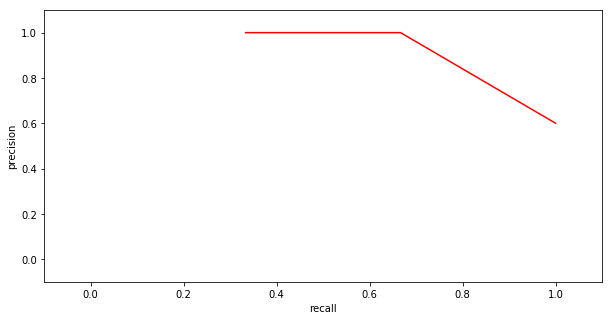

In [174]:
print_PR_curves(rangs)